# Using PYACDCPF


There are two functions that can be imported from PYACDCPF module, i.e. `pacdcoption` and `runacdcpf`. The first one is used to define the option while the later one is the main function to run a sequential AC/DC power flow . 

In [1]:
from pyacdcpf.pacdcoption import pacdcoption
from pyacdcpf.runacdcpf import runacdcpf

f### a. pacdcoption()

The list of the available options are given by the following table:

Option | Default values | Definition
--- | --- | ---
TOLACDC| 1e-8| tolerance ac/dc power flow
ITMAXACDC| 10| maximum iterations ac/dc power flow
TOLDC| 1e-8| tolerance dc power flow (Newton's method)
ITMAXDC| 10| maximum iterations dc power flow (Newton's method)
TOLSLACKDROOP| 1e-8| tolerance dc slack bus iteration
ITMAXSLACKDROOP| 10| maximum iterations dc slack bus iteration
TOLSLACKDROOPINT| 1e-8| tolerance internal slack bus iteration (Newton's method)
ITMAXSLACKDROOPINT| 10| maximum iterations internal slack bus iteration (Newton's method)
MULTSLACK| 0| multiple dc slack buses (dc voltage controlling converters) per dc grid 
         |  |0 - only 1 dc voltage controlling per dc grid allowed
         |  |1 - more than 1 dc voltage controlling per dc grid allowed
LIMAC| 0| enforce ac converter limits
     |  |0 - do NOT enforce limits
     |  |1 - enforce converter current and voltage limits
LIMDC| 0| enforce dc converter limits (not implemented)
TOLLIM| 1e-2| maximum difference between subsequent violations
OUTPUT| 1| print output
CONVPLOTOPT| 0| plot converter limit violations
           |  |0 - do not plot converter limit violations
           |  |1 - plot only converter limit violations
           |  |2 - plot converter limit violations and end situation

In [2]:
pdopt = pacdcoption()

In the example below, the converter limits are enforced and their plot should be shown (in Jupyter `%matplotlib inline` should be invoked to plot the figure inline within the output cell).

In [3]:
pdopt['LIMAC'] = 1
pdopt['CONVPLOTOPT'] = 1
pdopt

{'TOLACDC': 1e-08,
 'ITMAXACDC': 10,
 'TOLDC': 1e-08,
 'ITMAXDC': 10,
 'TOLSLACKDROOP': 1e-08,
 'ITMAXSLACKDROOP': 10,
 'TOLSLACKDROOPINT': 1e-08,
 'ITMAXSLACKDROOPINT': 10,
 'MULTSLACK': 0,
 'LIMAC': 1,
 'LIMDC': 0,
 'TOLLIM': 0.01,
 'OUTPUT': 1,
 'CONVPLOTOPT': 1}

### b. runacdcpf()

A default 5 bus AC system with 2 generators and 3 node DC systems is used when no inputs are given.

In [4]:
runacdcpf()


Sequential solution method converged in 3 iterations

Converged in 0.03 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses              5     Total Gen Capacity     550.0        -800.0 to 800.0
Generators         2     On-line Capacity       550.0        -800.0 to 800.0
Committed Gens     2     Generation (actual)    173.6              51.5
Loads              4     Load                   165.0              40.0
  Fixed            4       Fixed                165.0              40.0
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             0     Shunt (inj)              0.0               0.0
Branches           7     Losses (I^2 * Z)         4.39             13.18
Transformers       0     Branch Charging (inj)     -               29.6
Inter-ties         0    

({'baseMVA': 100.0,
  'bus': array([[  1.        ,   2.        ,  20.        ,  10.        ,
            0.        ,   0.        ,   1.        ,   1.        ,
           -2.38323031, 345.        ,   1.        ,   1.1       ,
            0.9       ],
         [  2.        ,   1.        ,  45.        ,  15.        ,
            0.        ,   0.        ,   1.        ,   1.        ,
           -3.89548957, 345.        ,   1.        ,   1.1       ,
            0.9       ],
         [  3.        ,   1.        ,  60.        ,  10.        ,
            0.        ,   0.        ,   1.        ,   0.9907587 ,
           -4.14954388, 345.        ,   1.        ,   1.1       ,
            0.9       ],
         [  4.        ,   3.        ,   0.        ,   0.        ,
            0.        ,   0.        ,   1.        ,   1.06      ,
            0.        , 345.        ,   1.        ,   1.1       ,
            0.9       ],
         [  5.        ,   1.        ,  40.        ,   5.        ,
            0. 

The output calculation of the sequential AC/DC power flow is stored as dictionaries. The convergence status and time elapsed for the iteration is also given as output.

In [5]:
resultac, resultdc, converged, time_elapsed = runacdcpf()


Sequential solution method converged in 3 iterations

Converged in 0.03 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses              5     Total Gen Capacity     550.0        -800.0 to 800.0
Generators         2     On-line Capacity       550.0        -800.0 to 800.0
Committed Gens     2     Generation (actual)    173.6              51.5
Loads              4     Load                   165.0              40.0
  Fixed            4       Fixed                165.0              40.0
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             0     Shunt (inj)              0.0               0.0
Branches           7     Losses (I^2 * Z)         4.39             13.18
Transformers       0     Branch Charging (inj)     -               29.6
Inter-ties         0    

Following example show how to run a sequential AC/DC powerflow for given cases (`caseac` and `casedc`) with defined option (`pdopt`).

Generator & VSC converter on the same bus
   Conflicting voltage control on bus 215
=> Corresponding VSC Converter set to PQ control without Q injections.
Non-synchronised zones: 3 AC zones detected.

  Reactive power setpoint of converter 3 changed from 130.00 MVAr to 114.17 MVAr. 


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


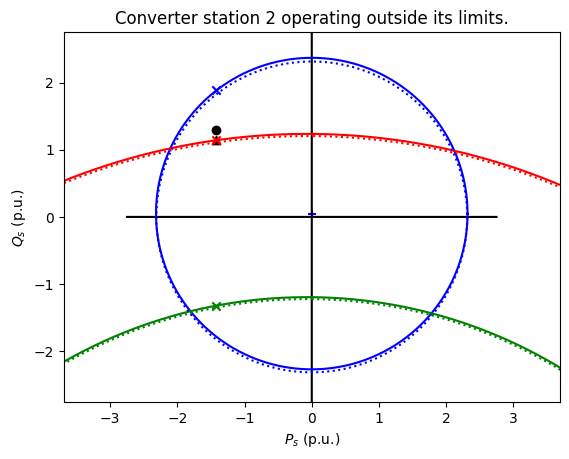


  Lower voltage limit at converter 5 : No intersections with current limit were found.

  Lower voltage limit at converter 6 : No intersections with current limit were found.

  Lower voltage limit at converter 7 : No intersections with current limit were found.

  Lower voltage limit at converter 5 : No intersections with current limit were found.

  Lower voltage limit at converter 6 : No intersections with current limit were found.

  Lower voltage limit at converter 7 : No intersections with current limit were found.

  Lower voltage limit at converter 5 : No intersections with current limit were found.

  Lower voltage limit at converter 6 : No intersections with current limit were found.

  Lower voltage limit at converter 7 : No intersections with current limit were found.

Sequential solution method converged in 3 iterations

  Lower voltage limit at converter 4 : No intersections with current limit were found.

  Lower voltage limit at converter 5 : No intersections with curr

In [6]:
from os.path import dirname, join
from os import getcwd
%matplotlib inline

caseac = join(getcwd(), 'Cases', 'PowerflowAC', 'case24_ieee_rts1996_3zones')
casedc = join(getcwd(), 'Cases', 'PowerflowDC', 'case24_ieee_rts1996_MTDC')

resultac, resultdc, _, _ = runacdcpf(caseac,casedc,pdopt)

## Test script

In [7]:
pdopt['OUTPUT'] = 0
pdopt['CONVPLOTOPT'] = 0
pdopt['LIMAC'] = 0

casedirac = join(getcwd(), 'Cases', 'PowerflowAC')
casedirdc = join(getcwd(), 'Cases', 'PowerflowDC')

print('Start the test sequence:')

print('1. Test voltage slack control:')
caseac = join(casedirac, 'case5_stagg')
casedc = join(casedirdc, 'case5_stagg_MTDCslack')
_, _, _, timecalc = runacdcpf(caseac,casedc,pdopt)
print('   Done in %.4f s\n'%timecalc)

print('2. Test voltage droop control:')
caseac = join(casedirac, 'case5_stagg')
casedc = join(casedirdc, 'case5_stagg_MTDCdroop')
_, _, _, timecalc = runacdcpf(caseac,casedc,pdopt)
print('   Done in %.4f s\n'%timecalc)

print('3. Test infinite grid:')
caseac = join(casedirac, 'case3_inf')
casedc = join(casedirdc, 'case5_stagg_MTDCdroop')
_, _, _, timecalc = runacdcpf(caseac,casedc,pdopt)
print('   Done in %.4f s\n'%timecalc)

print('4. Test multiple ac and dc systems:')
caseac = join(casedirac, 'case24_ieee_rts1996_3zones')
casedc = join(casedirdc, 'case24_ieee_rts1996_MTDC')
_, _, _, timecalc = runacdcpf(caseac,casedc,pdopt)
print('   Done in %.4f s\n'%timecalc)


Start the test sequence:
1. Test voltage slack control:
   Done in 0.0276 s

2. Test voltage droop control:
   Done in 0.0255 s

3. Test infinite grid:
   Done in 0.0135 s

4. Test multiple ac and dc systems:
Generator & VSC converter on the same bus
   Conflicting voltage control on bus 215
=> Corresponding VSC Converter set to PQ control without Q injections.
   Done in 0.0468 s

